<a href="https://colab.research.google.com/github/brrikcy/deep-learning/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Generator Model
def build_generator():
 model = tf.keras.Sequential([
 layers.Dense(128, activation="relu", input_shape=(100,)),
 layers.BatchNormalization(),
 layers.Dense(256, activation="relu"),
 layers.BatchNormalization(),
 layers.Dense(512, activation="relu"),
 layers.BatchNormalization(),
 layers.Dense(784, activation="tanh"),
 layers.Reshape((28, 28))
 ])
 return model

In [ ]:
# Discriminator model
def build_discriminator():
 model = tf.keras.Sequential([
 layers.Flatten(input_shape=(28, 28)),
 layers.Dense(512, activation="relu"),
 layers.Dense(256, activation="relu"),
 layers.Dense(1, activation="sigmoid")
 ])
 return model

In [ ]:
#compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#built and combine GAN
# GAN model (combines generator and discriminator)
discriminator.trainable = False # Freeze discriminator weights in GAN
generator = build_generator()
# GAN takes random noise as input and outputs decision (real or fake)
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the GAN
def train_gan(generator, discriminator, gan, epochs=10000, batch_size=128):
    (x_train, _), (_, _) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]

    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch) # This line and the following lines within the loop need to be indented
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise)


        # Discriminator loss on real and fake data
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

def train_gan(generator, discriminator, gan, epochs=10000, batch_size=128):
    (x_train, _), (_, _) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]

    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise)

        # Discriminator loss on real and fake data
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print the progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
            sample_images(generator, epoch)

def sample_images(generator, epoch, grid_size=5):
    noise = np.random.normal(0, 1, (grid_size * grid_size, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(gen_images[i * grid_size + j], cmap="gray")
            axs[i, j].axis("off")
    plt.show()

    x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]

    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise)

        # Discriminator loss on real and fake data
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print the progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
            sample_images(generator, epoch)

def sample_images(generator, epoch, grid_size=5):
    noise = np.random.normal(0, 1, (grid_size * grid_size, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(gen_images[i * grid_size + j], cmap="gray")
            axs[i, j].axis("off")
    plt.show()

    x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]

    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise)

        # Discriminator loss on real and fake data
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        # Print the progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
            sample_images(generator, epoch)

def sample_images(generator, epoch, grid_size=5):
    noise = np.random.normal(0, 1, (grid_size * grid_size, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(gen_images[i * grid_size + j], cmap="gray")
            axs[i, j].axis("off")
    plt.show()

def sample_images(generator, epoch, grid_size=5):
    noise = np.random.normal(0, 1, (grid_size * grid_size, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(gen_images[i * grid_size + j], cmap="gray")
            axs[i, j].axis("off") # This line and the following line were indented to be inside the nested for loop
    plt.show() # This line was dedented to be outside the nested for loop

In [ ]:
#Load and Preprocess the Dataset
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5 # Normalize to [-1, 1]

In [ ]:
# Set the Batch Size and Half-Batch Size
batch_size = 128
half_batch = batch_size // 2


In [ ]:
# Training Loop
idx = np.random.randint(0, x_train.shape[0], half_batch)
real_images = x_train[idx]



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.4463, acc.: 100.00%] [G loss: 0.5576]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


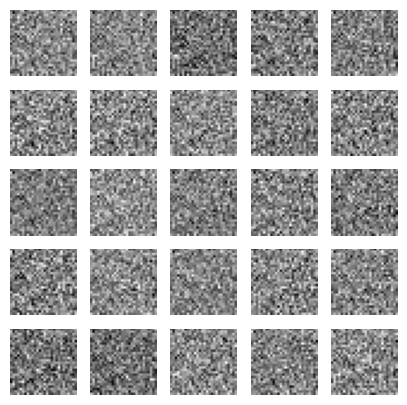

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━

In [ ]:
# Define epoch before entering loop
for epoch in range(100):  # Assume num_epochs is defined. Replace with your desired number of epochs.

    noise = np.random.normal(0, 1, (half_batch, 100))
    generated_images = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))

    # Access the loss value directly, assuming d_loss_real and d_loss_fake are single values or tuples
    d_loss_real_value = d_loss_real[0] if isinstance(d_loss_real, (list, tuple)) else d_loss_real
    d_loss_fake_value = d_loss_fake[0] if isinstance(d_loss_fake, (list, tuple)) else d_loss_fake

    d_loss = 0.5 * np.add(d_loss_real_value, d_loss_fake_value)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Access the loss value directly, assuming g_loss is a single value or tuple
    g_loss_value = g_loss[0] if isinstance(g_loss, (list, tuple)) else g_loss

    # Now epoch is defined within the loop
    if epoch % 1000 == 0:
        # Access loss and accuracy separately if d_loss is a list or tuple
        d_loss_value = d_loss  # Use d_loss_value instead of d_loss[0]
        accuracy = d_loss_real[1] if isinstance(d_loss_real, (list, tuple)) and len(d_loss_real) > 1 else 0  # Handle cases where d_loss might not have accuracy

        # Access g_loss value separately if it's a list or tuple
        g_loss_value = g_loss[0] if isinstance(g_loss, (list, tuple)) else g_loss

        # Format the numeric values for printing
        print(f"{epoch} [D loss: {d_loss_value:.4f}, acc.: {100 * accuracy:.2f}%] [G loss: {g_loss_value:.4f}]")  # Use d_loss_value instead of d_loss[0]
        sample_images(generator, epoch)

In [ ]:
# SAmpling images
def sample_images(generator, epoch, grid_size=5):
 noise = np.random.normal(0, 1, (grid_size * grid_size, 100))
 gen_images = generator.predict(noise)
 gen_images = 0.5 * gen_images + 0.5 # Rescale to [0, 1]

 fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5))
 for i in range(grid_size):
     for j in range(grid_size):
        axs[i, j].imshow(gen_images[i * grid_size + j], cmap="gray")
        axs[i, j].axis("off")
 plt.show()

In [ ]:
def train_gan(generator, discriminator, gan, epochs, batch_size):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Get a random batch of real images
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]

        # Generate a batch of fake images
        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))

        # Extract loss and accuracy from d_loss_real and d_loss_fake if available
        d_loss_real_value = d_loss_real[0] if isinstance(d_loss_real, (list, tuple)) else d_loss_real
        d_loss_fake_value = d_loss_fake[0] if isinstance(d_loss_fake, (list, tuple)) else d_loss_fake
        accuracy = d_loss_real[1] if isinstance(d_loss_real, (list, tuple)) and len(d_loss_real) > 1 else 0

        d_loss = 0.5 * np.add(d_loss_real_value, d_loss_fake_value)  # Calculate overall discriminator loss

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Extract g_loss value
        g_loss_value = g_loss[0] if isinstance(g_loss, (list, tuple)) else g_loss

        # Print the progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss:.4f}, acc.: {100 * accuracy:.2f}%] [G loss: {g_loss_value:.4f}]")  # Format using extracted values
            sample_images(generator, epoch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0 [D loss: 1.5279, acc.: 50.15%] [G loss: 1.5321]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


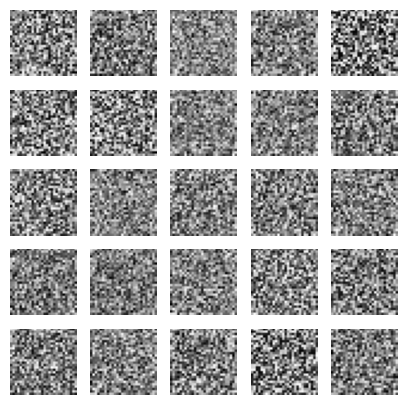

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [ ]:
#Train the GAN on the MNIST dataset.
train_gan(generator, discriminator, gan, epochs=100, batch_size=64)